<a href="https://colab.research.google.com/github/DanyelMorales/MLLearneerRepo/blob/main/%20earthquake_not_conveying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

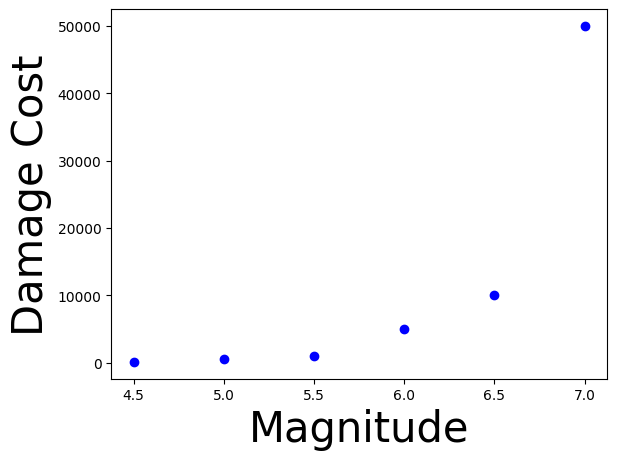

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import seaborn as sns



xLabel = "Magnitude"
yLabel = "Damage Cost"

plt.ion()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

X,Y =np.loadtxt("https://raw.githubusercontent.com/DanyelMorales/MLLearneerRepo/main/dataset/earthquake_damage.txt",skiprows=1, unpack=True)
plt.xlabel(xLabel, fontsize=30)
plt.ylabel(yLabel,fontsize=30)
ax.plot(X,Y, "bo")

def graph(X1,Y1, id):
    ax.set_xlim(0, id)
    ax.cla()
    ax.plot(X1,Y1, "bo")
    line1, = ax.plot(X1,X1, 'b-')
    display(fig)
    clear_output(wait = True)
    plt.pause(0.5)
    return line1


def updateLine(X1,Y1,theLine):
    plt.xlabel(xLabel, fontsize=30)
    plt.ylabel(yLabel,fontsize=30)
    theLine.set_ydata(Y1)
    theLine.set_xdata(X1)
    display(fig)
    clear_output(wait = True)
    #plt.pause(0.5)



In [7]:
def showHistory(X,Y,historyW, step=2):
  theLine=graph(X,Y,1)
  updateLineL = lambda w :  updateLine(X,predict(X,w[0],w[1]),theLine)
  for i in range(0,len(historyW),step):
    w=historyW[i]
    updateLineL(w)
  updateLineL(historyW[-1])

def predict(X, w,b):
  return X * w + b

def loss(X,Y,w,b):
  error = predict(X,w,b)-Y
  squared_error = error ** 2
  return np.average(squared_error)

def train(iterations, X,Y, lr):
  w=b=0
  historyW=[]
  for i in range(iterations):
    historyW.append([w,b])
    tmpLoss=loss(X,Y,w,b)
    print(f"\n iteration={i} bias={b} loss={tmpLoss}")
    if(loss(X,Y,w+lr,b)<tmpLoss):
      w+=lr
    elif(loss(X,Y,w-lr,b)<tmpLoss):
      w-=lr
    elif(loss(X,Y,w,b+lr)<tmpLoss):
      b+=lr
    elif(loss(X,Y,w,b-lr)<tmpLoss):
      b-=lr
    else:
      return [w,b, historyW]
  raise Exception(f"cannot convey after {iterations} iterations")

w,b, history =train(50000, X,Y, 0.01)
print(f"\nw={w}, b={b}")
print(f"Prediction: x=8, Y=>{predict(8, w,b)}")


Streaming output truncated to the last 5000 lines.

 iteration=47500 bias=0 loss=373537994.79170084

 iteration=47501 bias=0 loss=373536804.31591326

 iteration=47502 bias=0 loss=373535613.8468841

 iteration=47503 bias=0 loss=373534423.38461334

 iteration=47504 bias=0 loss=373533232.9291008

 iteration=47505 bias=0 loss=373532042.4803467

 iteration=47506 bias=0 loss=373530852.0383508

 iteration=47507 bias=0 loss=373529661.6031134

 iteration=47508 bias=0 loss=373528471.17463416

 iteration=47509 bias=0 loss=373527280.7529133

 iteration=47510 bias=0 loss=373526090.3379509

 iteration=47511 bias=0 loss=373524899.9297467

 iteration=47512 bias=0 loss=373523709.5283008

 iteration=47513 bias=0 loss=373522519.13361335

 iteration=47514 bias=0 loss=373521328.7456842

 iteration=47515 bias=0 loss=373520138.3645134

 iteration=47516 bias=0 loss=373518947.9901009

 iteration=47517 bias=0 loss=373517757.6224467

 iteration=47518 bias=0 loss=373516567.2615509

 iteration=47519 bias=0 loss=37

Exception: cannot convey after 50000 iterations

KeyboardInterrupt: 

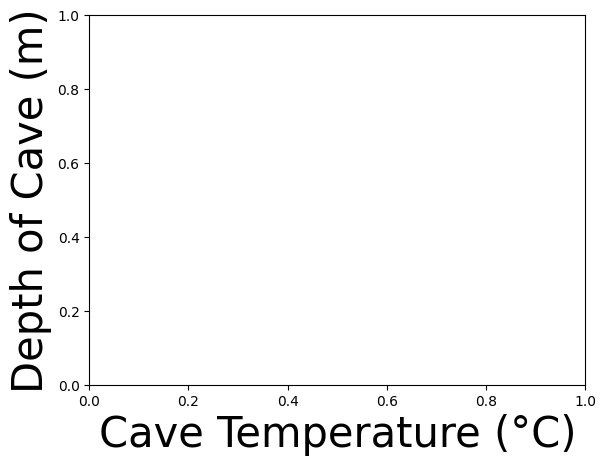

In [ ]:
showHistory(X,Y, history,15)

In [ ]:
print(f"Prediction: x=8, Y=>{predict(8, w,b)}")

Prediction: x=8, Y=>50.09999999999933
